In [1]:
import pandas
# 1.2.1 Créez un code qui lit le fichier "housing.csv" et affiche ses premières lignes. Pour ce faire,
# utilisez les fonctions "read_csv" et "head" de la bibliothèque pandas. Sachant que la valeur
# cible est "median_house_value", traitons-nous un problème de classification ou de régression
# ?
df = pandas.read_csv('housing.csv')
# C'est une problèmes de régression
print(df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [3]:
# 1.2.2 Créez un code qui affiche le nombre de lignes et de colonnes des données, le type des attributs
# et le nombre de valeurs non nulles. Quelle remarque sur l’attribut "total_bedrooms"
# par rapport aux autres attributs ?
print('nb de lignes =', len(df.index), '\n\nb de colonnes =', len(df.columns), '\n\ntype des colonnes :\n', df.dtypes, '\n')
for col in df:
    print('nb de valeur non null dans', col, ':', (df[col].notnull()).sum())
# La colonne total_bedrooms a 7 valeurs null

nb de lignes = 20640 

b de colonnes = 10 

type des colonnes :
 longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object 

nb de valeur non null dans longitude : 20640
nb de valeur non null dans latitude : 20640
nb de valeur non null dans housing_median_age : 20640
nb de valeur non null dans total_rooms : 20640
nb de valeur non null dans total_bedrooms : 20433
nb de valeur non null dans population : 20640
nb de valeur non null dans households : 20640
nb de valeur non null dans median_income : 20640
nb de valeur non null dans median_house_value : 20640
nb de valeur non null dans ocean_proximity : 20640


In [4]:
# 1.2.3 A travers la question précédente, vous avez du remarquez que le type dans valeurs utilisées
# dans l’attribut "ocean_proximity" est un objet (forcément un texte vu qu’on manipule un
# fichier CSV). Il est intéressant de connaître ses valeurs. Pour cette finalité, créez un code qui
# affiche l’occurrence des valeurs utilisées dans cet attribut.
print(df['ocean_proximity'].value_counts())

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


In [9]:
# 1.2.4 Créez un code qui affiche des statistiques sur les attributs de ton jeu de données.
df.describe(include = 'all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


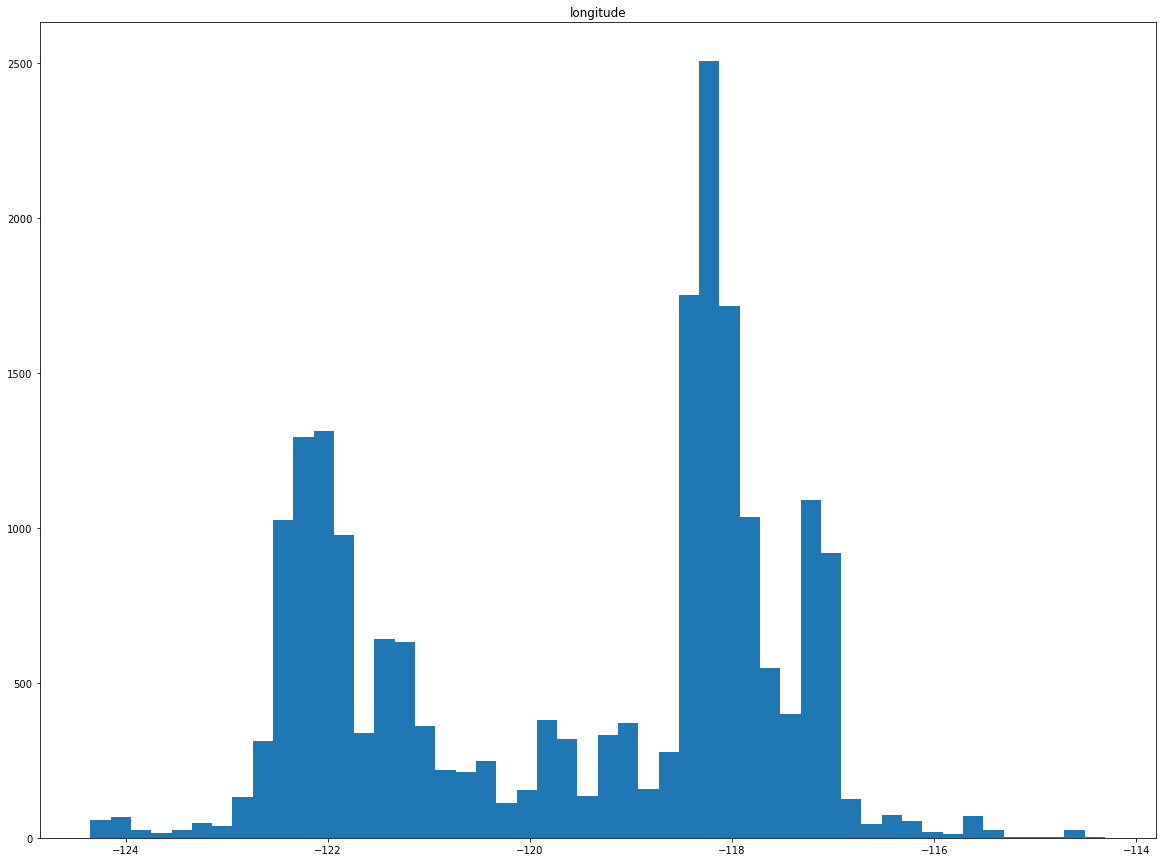

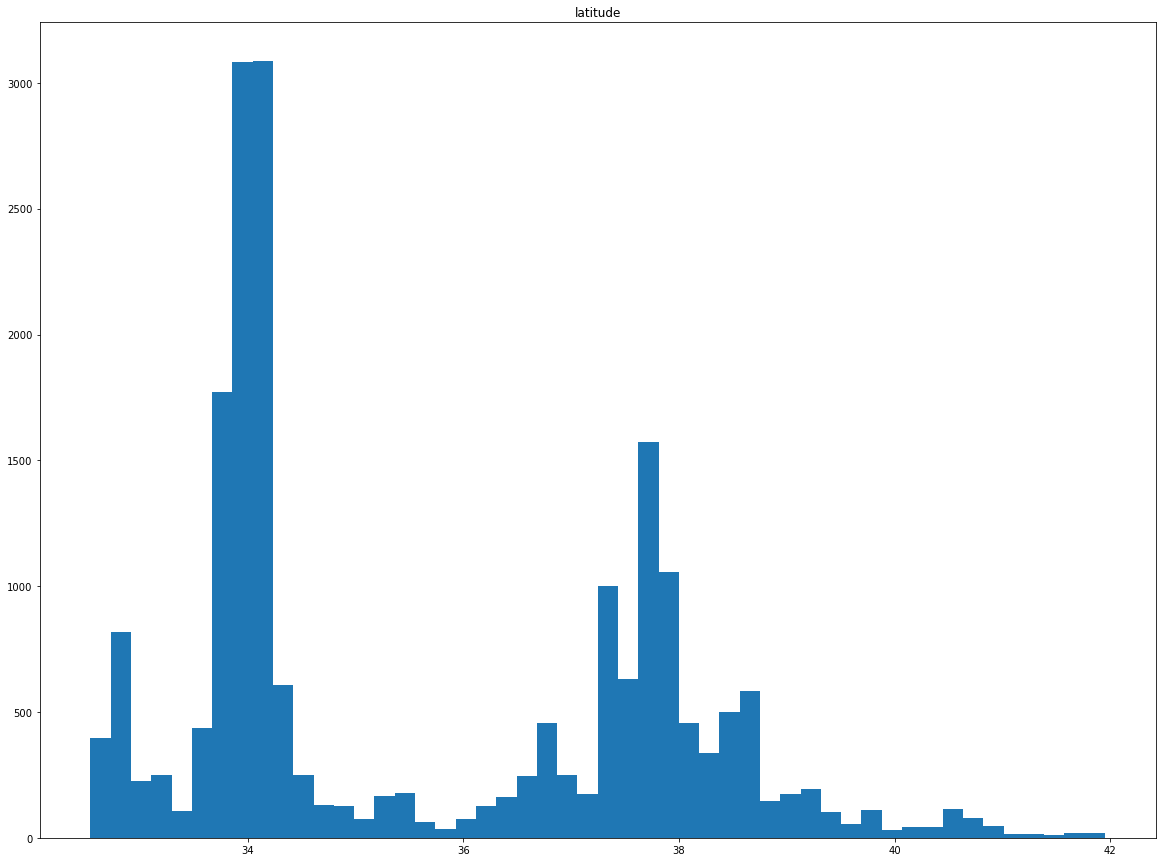

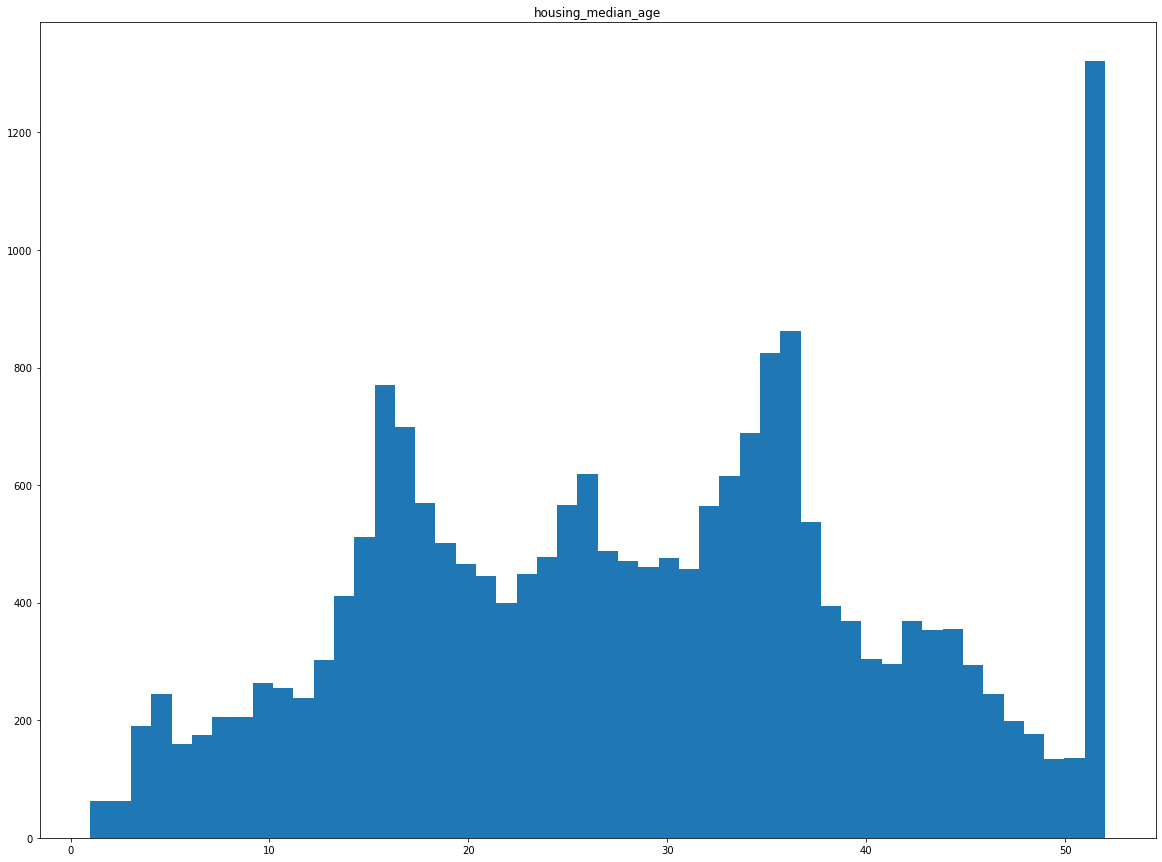

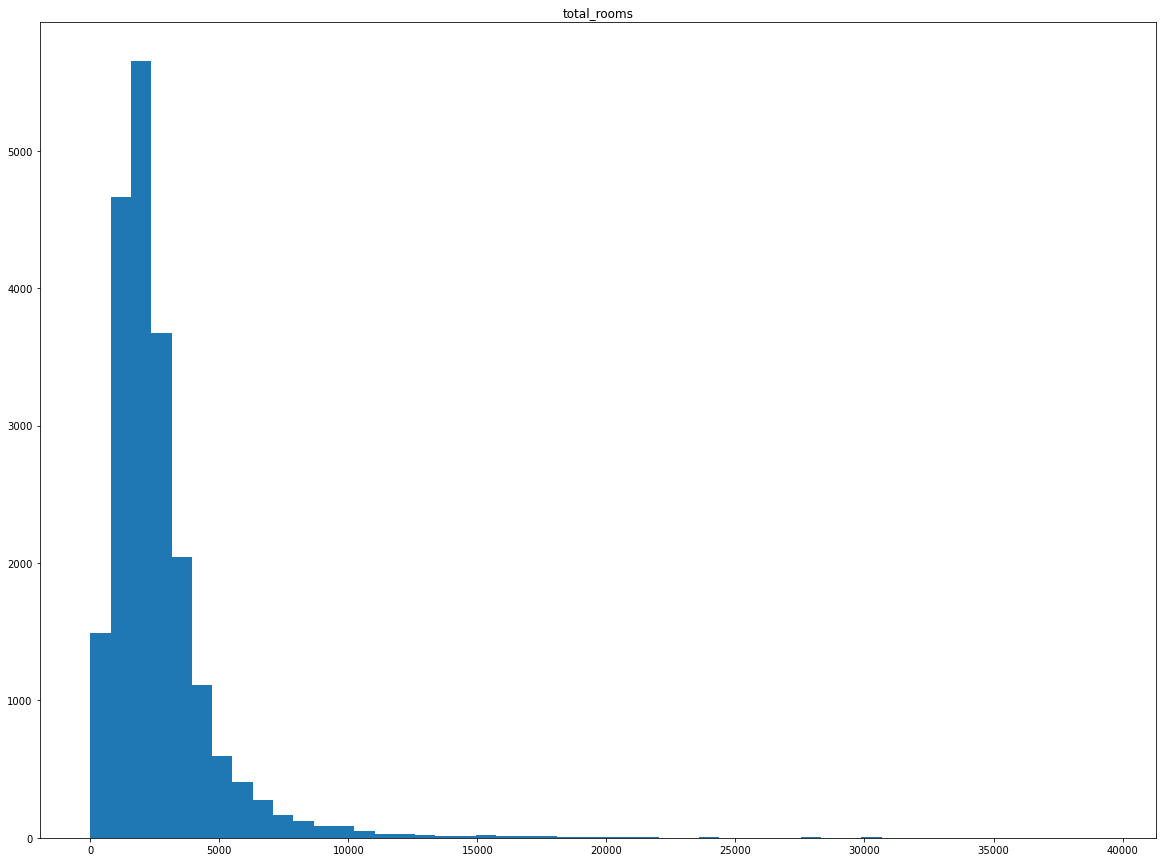

C:\Users\depannage\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\depannage\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


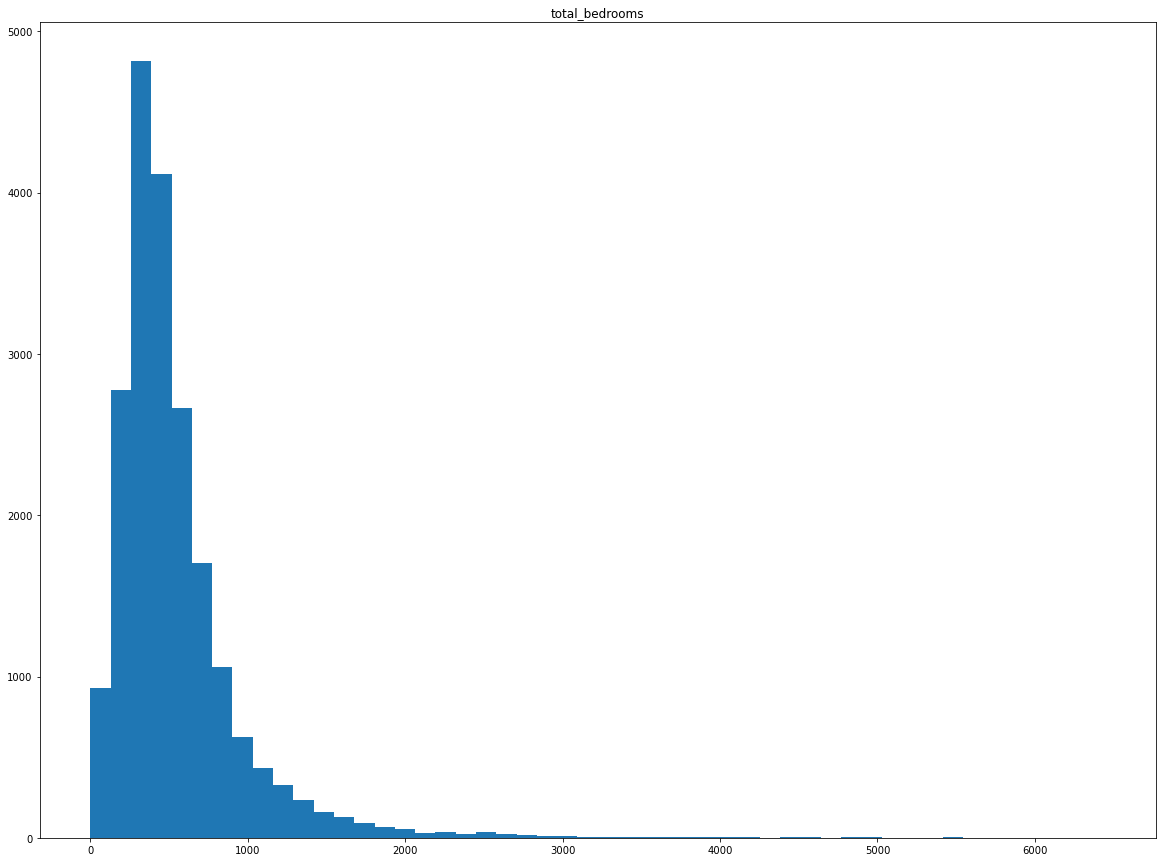

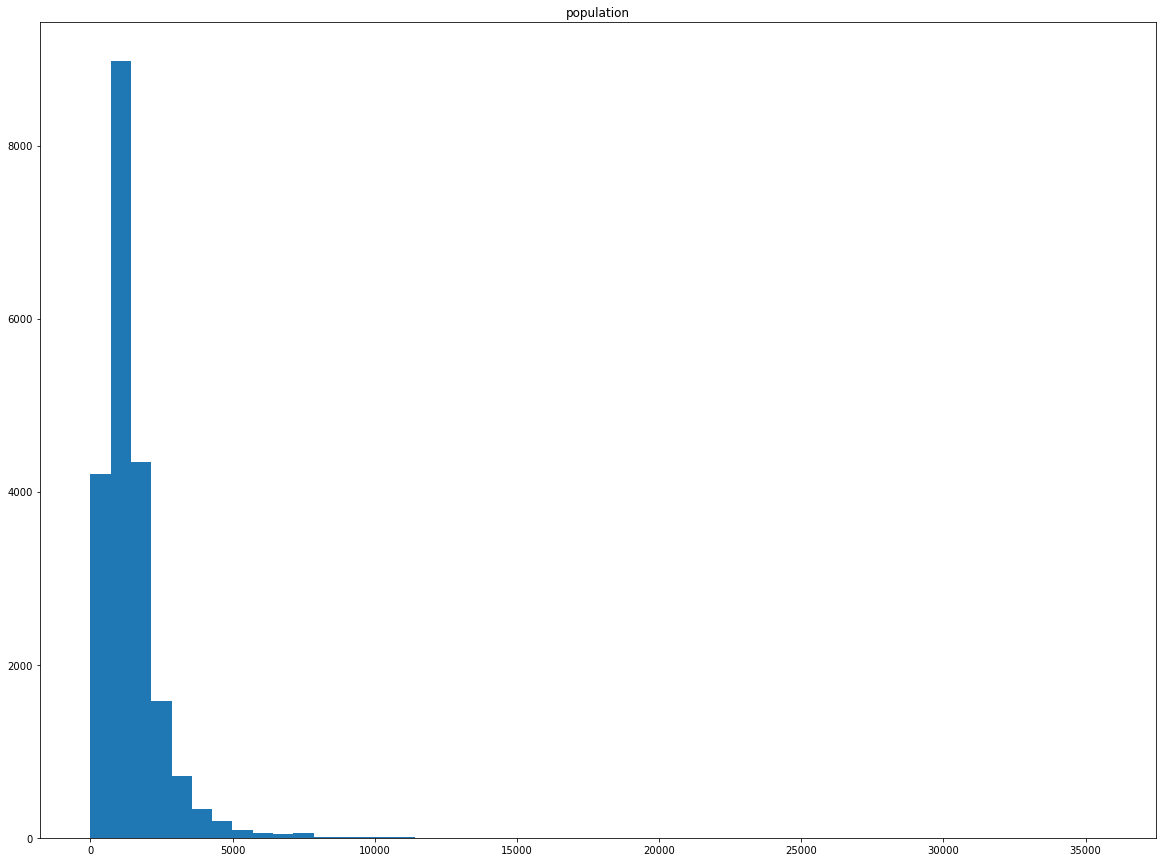

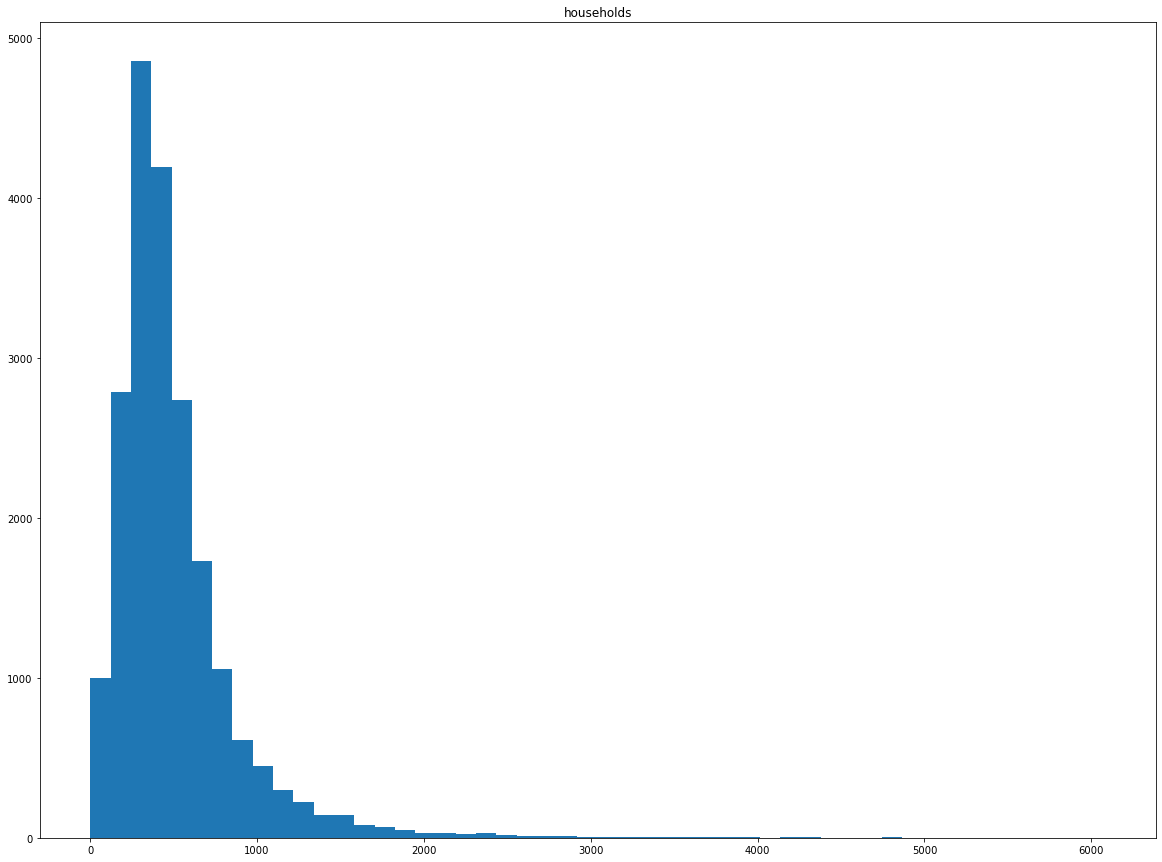

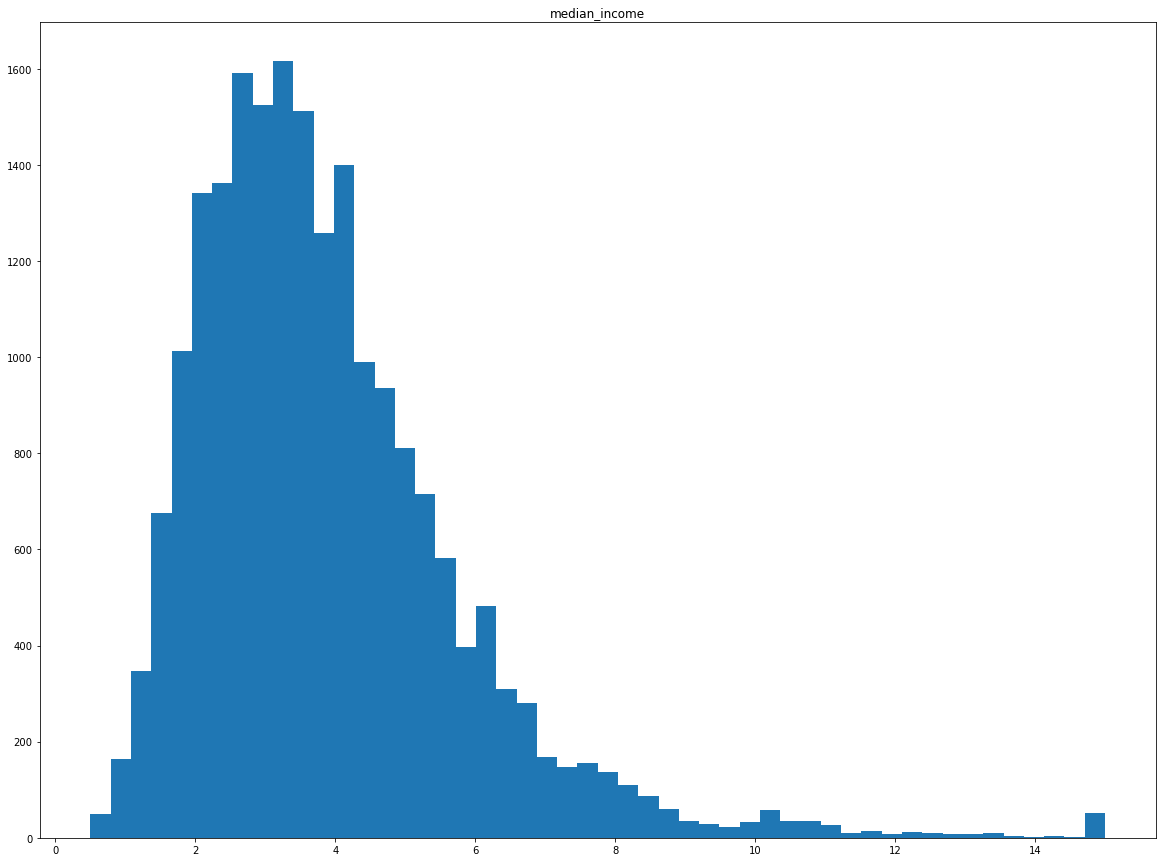

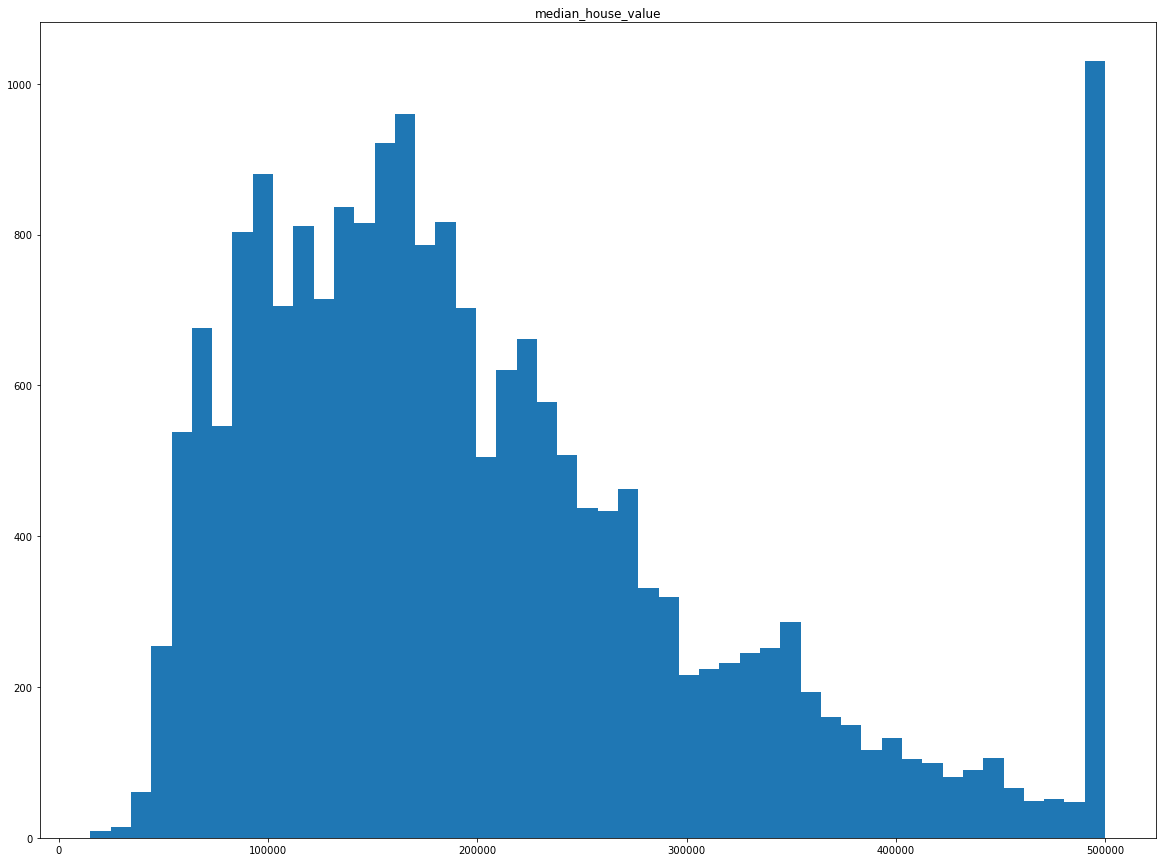

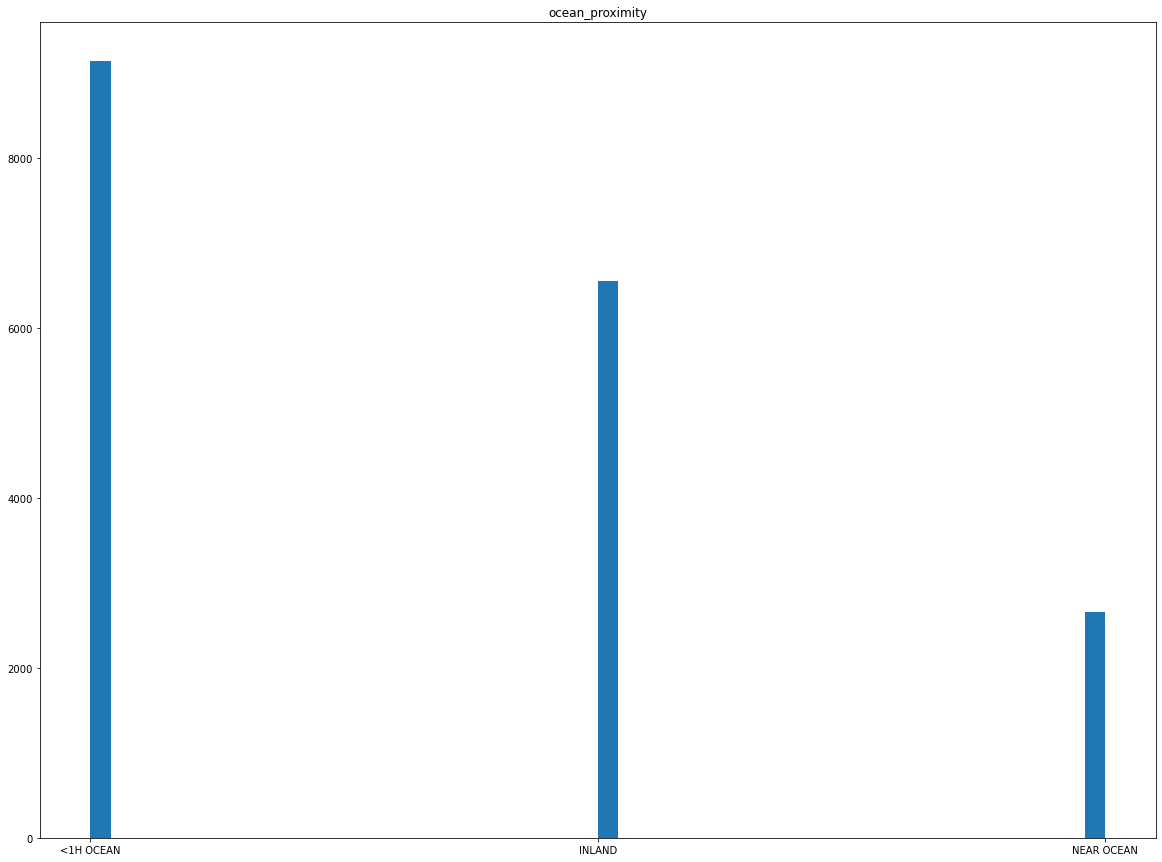

In [8]:
from matplotlib import pyplot
# 1.2.5 Créez un code qui affiche les histogrammes des différents attributs. Le nombre de "bins" à
# saisir est 50 et la taille de chaque histogramme "figsize=(20,15)".
for x in df:
    pyplot.figure(figsize = (20, 15))
    pyplot.hist(df[x], range = (df[x].min(), df[x].max()), bins = 50)
    pyplot.title(x)
    pyplot.show()

In [11]:
# 1.3.1 Créez un code qui partitionne les données en base d’apprentissage et base de test. Optez
# pour 80% pour l’apprentissage et 20% pour le test.
nbligne = len(df.index)
pourcentage = int(nbligne * 80/100)
apprent = df.head(pourcentage)
teste = df.tail(nbligne-pourcentage)

In [12]:
# 1.3.2 Affichez l’en-tête de la base de test
print(teste.head())

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
16512    -121.22     37.72                34.0       2123.0           387.0   
16513    -121.22     37.81                17.0       2879.0           542.0   
16514    -121.22     37.80                28.0       2608.0           576.0   
16515    -121.22     37.80                37.0       1038.0           222.0   
16516    -121.21     37.81                18.0       2404.0           498.0   

       population  households  median_income  median_house_value  \
16512      1310.0       368.0         2.6368            165600.0   
16513      1802.0       530.0         3.6378            126100.0   
16514      1719.0       554.0         2.1186             94400.0   
16515       521.0       211.0         2.1250             91900.0   
16516      1531.0       506.0         2.9950            124300.0   

      ocean_proximity  
16512          INLAND  
16513          INLAND  
16514          INLAND  
16515          INLAN

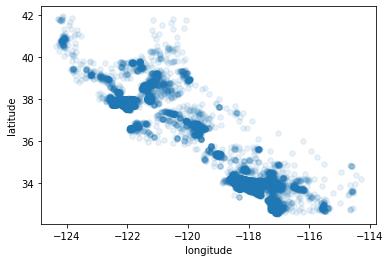

In [19]:
# 1.4.1 Créez un code qui affiche en abscisse la longitude et en ordonnée la latitude. Optez pour le
# type scatter dans la fonction plot pour l’affichage et une valeur d’alpha (c’est un paramètre
# qui joue sur la transparence de la courbe) de 0.1 pour un affichage plus clair.
pyplot.scatter(apprent['longitude'], apprent['latitude'], marker = 'o', s = 30, alpha=0.1)
pyplot.xlabel('longitude')
pyplot.ylabel('latitude')
pyplot.show()

In [ ]:
# 1.4.2 Créez un code qui permet d’avoir une idée sur le lien entre la position géographique et le
# prix des maisons (target). Optez pour une valeur égale à False de "sharex".